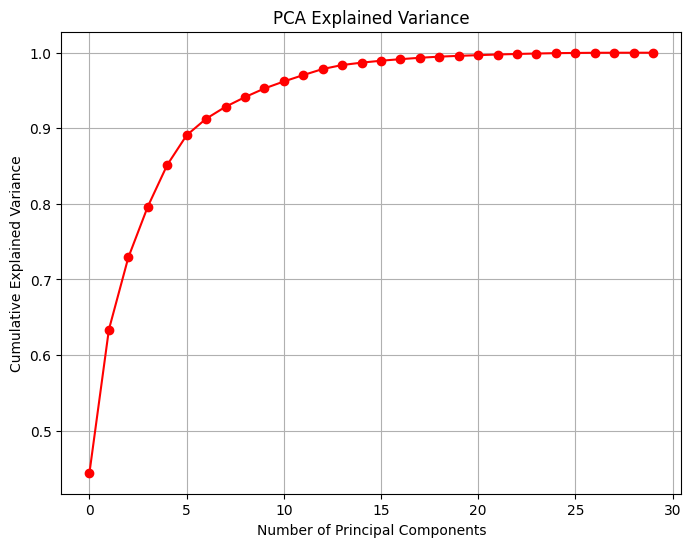

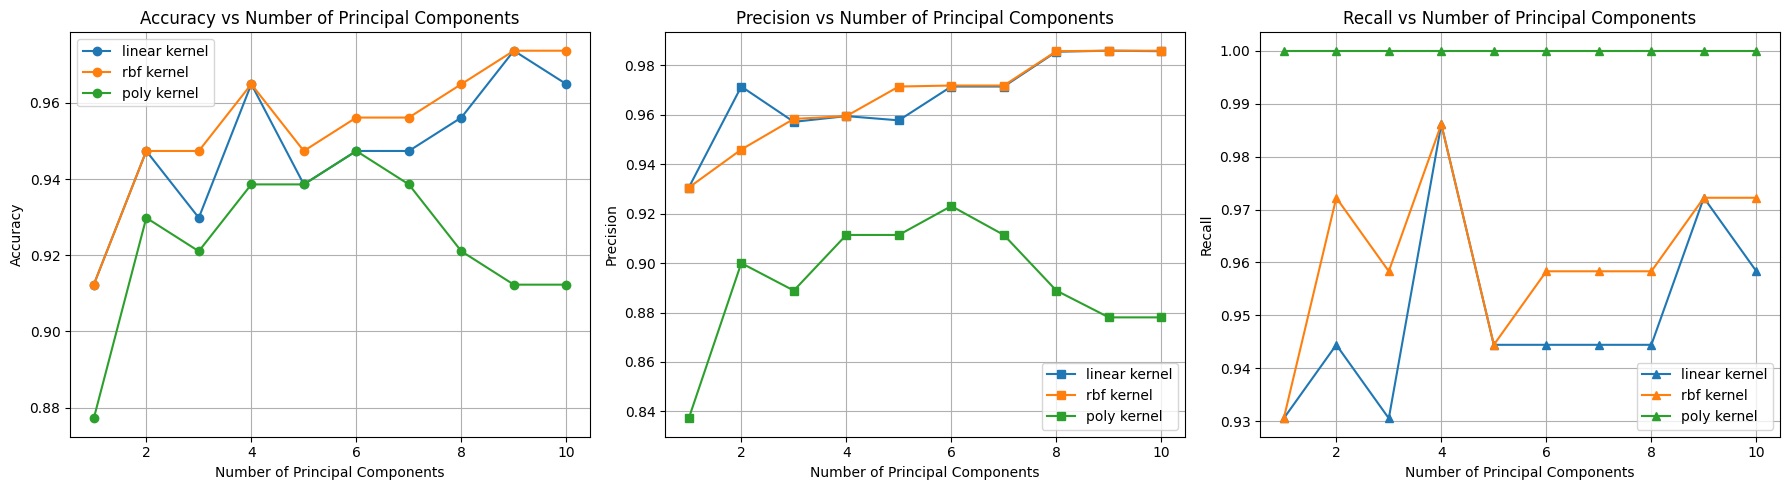

Logistic Regression (HW3) - Accuracy: 0.98, Precision: 0.99, Recall: 0.98


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load dataset
cancer_data = load_breast_cancer()
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df_cancer['target'] = cancer_data.target

X = df_cancer.drop('target', axis=1).values
y = df_cancer['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize cumulative explained variance to decide on number of components
pca_full = PCA().fit(X_train_scaled)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', color='red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Lists to store evaluation metrics
max_k = 10 
accuracy_scores = {'linear': [], 'rbf': [], 'poly': []}
precision_scores = {'linear': [], 'rbf': [], 'poly': []}
recall_scores = {'linear': [], 'rbf': [], 'poly': []}

# Loop through different numbers of PCA components
for k in range(1, max_k + 1):
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Experiment with different SVM kernels
    for kernel in ['linear', 'rbf', 'poly']:
        svm = SVC(kernel=kernel, random_state=42)
        
        # Train the SVM classifier
        svm.fit(X_train_pca, y_train)
        
        # Make predictions
        y_pred = svm.predict(X_test_pca)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        # Store results
        accuracy_scores[kernel].append(accuracy)
        precision_scores[kernel].append(precision)
        recall_scores[kernel].append(recall)

# Plotting results
k_values = range(1, max_k + 1)

plt.figure(figsize=(18, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
for kernel in accuracy_scores:
    plt.plot(k_values, accuracy_scores[kernel], marker='o', label=f'{kernel} kernel')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Principal Components')
plt.legend()
plt.grid(True)

# Plot Precision
plt.subplot(1, 3, 2)
for kernel in precision_scores:
    plt.plot(k_values, precision_scores[kernel], marker='s', label=f'{kernel} kernel')
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')
plt.title('Precision vs Number of Principal Components')
plt.legend()
plt.grid(True)

# Plot Recall
plt.subplot(1, 3, 3)
for kernel in recall_scores:
    plt.plot(k_values, recall_scores[kernel], marker='^', label=f'{kernel} kernel')
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')
plt.title('Recall vs Number of Principal Components')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# values from Homework 3
logistic_regression_accuracy = 0.9825  
logistic_regression_precision = 0.9859  
logistic_regression_recall = 0.9829  

# Display comparison
print(f"Logistic Regression (HW3) - Accuracy: {logistic_regression_accuracy:.2f}, "
      f"Precision: {logistic_regression_precision:.2f}, Recall: {logistic_regression_recall:.2f}")


Ridge Regression MSE: 967304128476.79
SVR RBF Kernel MSE: 2943512986923.79
SVR Linear Kernel MSE: 1798280910506.73
SVR Polynomial Kernel MSE: 2959410847126.26
Optimal number of PCA components for RBF kernel: 1, MSE: 2844076693503.25


/tmp/ipykernel_16224/4234416372.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_df[binary_columns] = housing_df[binary_columns].replace({'yes': 1, 'no': 0})


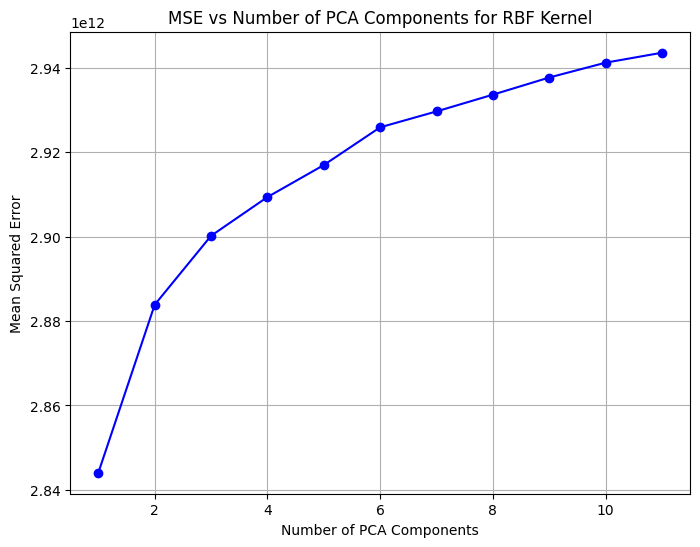

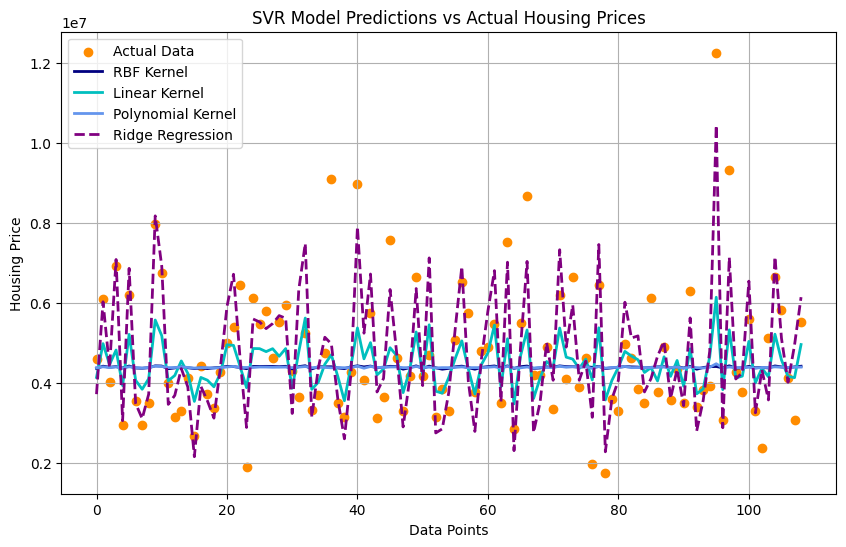

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load dataset
housing_df = pd.read_csv('assets/Housing.csv')
binary_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
housing_df[binary_columns] = housing_df[binary_columns].replace({'yes': 1, 'no': 0})

# Define input features and target
labels = ["area", "bedrooms", "bathrooms", "stories", "mainroad", 
           "guestroom", "basement", "hotwaterheating", "airconditioning", 
           "parking", "prefarea"]
X = housing_df[labels]
y = housing_df['price']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# #############################################################################
# 1. Fit SVR models with different kernels
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Fit models
y_rbf_pred = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin_pred = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly_pred = svr_poly.fit(X_train, y_train).predict(X_test)

# #############################################################################
# 2. Compare with linear regression (Ridge Regression as a regularized model)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)

# Calculate MSE for each SVR model
mse_rbf = mean_squared_error(y_test, y_rbf_pred)
mse_lin = mean_squared_error(y_test, y_lin_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)

print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"SVR RBF Kernel MSE: {mse_rbf:.2f}")
print(f"SVR Linear Kernel MSE: {mse_lin:.2f}")
print(f"SVR Polynomial Kernel MSE: {mse_poly:.2f}")

# #############################################################################
# 3. Use PCA and identify optimal number of components (K) for highest accuracy
component_range = range(1, 12)
mse_scores = []
optimal_components = 0
best_mse = float("inf")

for k in component_range:
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train and evaluate RBF SVR on reduced data
    svr_rbf_pca = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_rbf_pca.fit(X_train_pca, y_train)
    y_rbf_pca_pred = svr_rbf_pca.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_rbf_pca_pred)
    mse_scores.append(mse)
    
    # Track the best MSE and optimal number of components
    if mse < best_mse:
        best_mse = mse
        optimal_components = k

print(f"Optimal number of PCA components for RBF kernel: {optimal_components}, MSE: {best_mse:.2f}")

# Plot MSE vs Number of Components for RBF Kernel
plt.figure(figsize=(8, 6))
plt.plot(component_range, mse_scores, marker='o', color='blue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Number of PCA Components for RBF Kernel')
plt.grid(True)
plt.show()

# #############################################################################
# 4. Visualization of SVR model predictions
plt.figure(figsize=(10, 6))
lw = 2
plt.scatter(range(len(y_test)), y_test, color='darkorange', label='Actual Data')
plt.plot(range(len(y_test)), y_rbf_pred, color='navy', lw=lw, label='RBF Kernel')
plt.plot(range(len(y_test)), y_lin_pred, color='c', lw=lw, label='Linear Kernel')
plt.plot(range(len(y_test)), y_poly_pred, color='cornflowerblue', lw=lw, label='Polynomial Kernel')
plt.plot(range(len(y_test)), y_ridge_pred, color='purple', lw=lw, linestyle='--', label='Ridge Regression')
plt.xlabel('Data Points')
plt.ylabel('Housing Price')
plt.title('SVR Model Predictions vs Actual Housing Prices')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_16224/1444923476.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0})


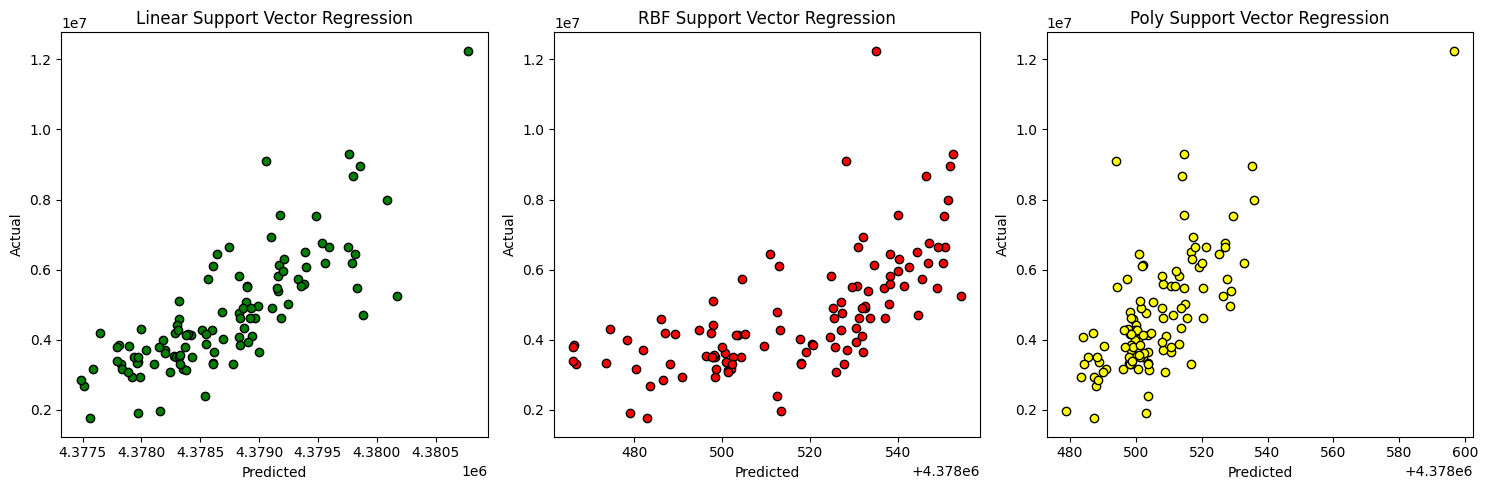

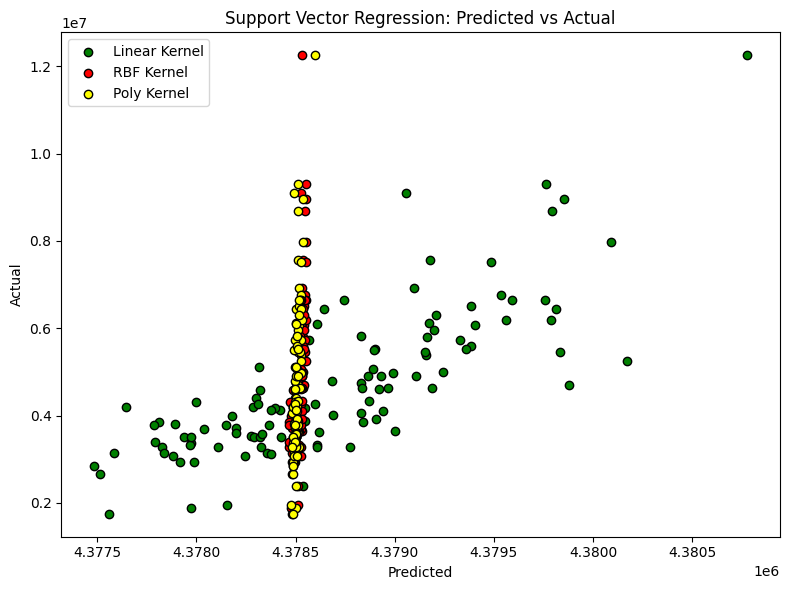

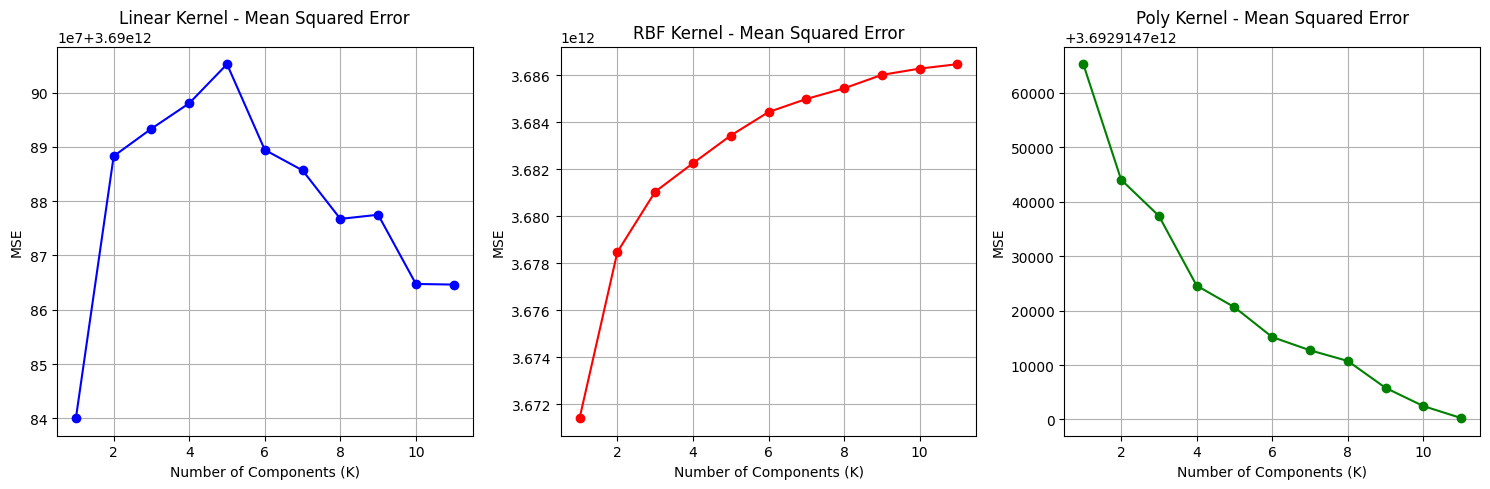

Linear Kernel - Optimal Components: 1, Lowest MSE: 3690840057061.9053
RBF Kernel - Optimal Components: 1, Lowest MSE: 3671413921391.4365
Poly Kernel - Optimal Components: 11, Lowest MSE: 3692914700269.1548


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


def convert_binary_columns(df):
    df = df.copy()  # Create a copy to avoid modifying the original
    df[binary_columns] = (
        df[binary_columns]
        .replace({'yes': 1, 'no': 0})
        .astype('int8')  # Using int8 since we only need 0 and 1
    )
    return df

# Load dataset
housing_df = pd.read_csv('assets/Housing.csv')
housing_df = convert_binary_columns(housing_df)
labels = ["area", "bedrooms", "bathrooms", "stories", "mainroad", 
           "guestroom", "basement", "hotwaterheating", "airconditioning", 
           "parking", "prefarea"]


# Separate features and target variable
X = housing_df[labels]
y = housing_df['price'].values.reshape(-1, 1)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Define SVR models
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)

# Train and predict
y_rbf_pred = svr_rbf.fit(X_train, y_train.ravel()).predict(X_test)
y_lin_pred = svr_lin.fit(X_train, y_train.ravel()).predict(X_test)
y_poly_pred = svr_poly.fit(X_train, y_train.ravel()).predict(X_test)

# Plotting predicted vs actual for each kernel
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_lin_pred, y_test, color='green', edgecolor='k')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Support Vector Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_rbf_pred, y_test, color='red', edgecolor='k')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RBF Support Vector Regression')

plt.subplot(1, 3, 3)
plt.scatter(y_poly_pred, y_test, color='yellow', edgecolor='k')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Poly Support Vector Regression')
plt.tight_layout()
plt.show()

# Combined plot
plt.figure(figsize=(8, 6))
plt.scatter(y_lin_pred, y_test, color='green', edgecolor='k', label='Linear Kernel')
plt.scatter(y_rbf_pred, y_test, color='red', edgecolor='k', label='RBF Kernel')
plt.scatter(y_poly_pred, y_test, color='yellow', edgecolor='k', label='Poly Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Regression: Predicted vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

# Function for SVR training with cross-validation and PCA
def svr_train_cv(X, y, kernel_type, component_range, C=1, gamma=0.01, param_grid=None):
    mse_scores = []
    best_mse, optimal_components = float('inf'), None
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for k in component_range:
        # Apply PCA
        pca = PCA(n_components=k)
        X_reduced = pca.fit_transform(X)

        # Grid search for RBF kernel
        if param_grid and kernel_type == 'rbf':
            svr = SVR(kernel=kernel_type)
            grid_search = GridSearchCV(svr, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
            grid_search.fit(X_reduced, y.ravel())
            best_params = grid_search.best_params_
            svr_model = SVR(kernel=kernel_type, **best_params)
        else:
            svr_model = SVR(kernel=kernel_type, C=C, gamma=gamma)

        # Cross-validation for each K
        fold_mse = []
        for train_index, test_index in kf.split(X_reduced):
            X_train_cv, X_test_cv = X_reduced[train_index], X_reduced[test_index]
            y_train_cv, y_test_cv = y[train_index], y[test_index]

            svr_model.fit(X_train_cv, y_train_cv.ravel())
            y_pred_cv = svr_model.predict(X_test_cv)
            mse = mean_squared_error(y_test_cv, y_pred_cv)
            fold_mse.append(mse)

        avg_mse = np.mean(fold_mse)
        mse_scores.append(avg_mse)

        if avg_mse < best_mse:
            best_mse = avg_mse
            optimal_components = k

    return mse_scores, best_mse, optimal_components

# Define the component range and parameters for grid search
component_range = list(range(1, 12))
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1]}

# Train models with PCA and plot MSE for each kernel
lin_mse_scores, lin_mse, lin_K = svr_train_cv(X_scaled, y, 'linear', component_range)
rbf_mse_scores, rbf_mse, rbf_K = svr_train_cv(X_scaled, y, 'rbf', component_range, param_grid=param_grid_svr)
poly_mse_scores, poly_mse, poly_K = svr_train_cv(X_scaled, y, 'poly', component_range)

# Plot MSE for each kernel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(component_range, lin_mse_scores, marker='o', color='blue')
plt.title('Linear Kernel - Mean Squared Error')
plt.xlabel('Number of Components (K)')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(component_range, rbf_mse_scores, marker='o', color='red')
plt.title('RBF Kernel - Mean Squared Error')
plt.xlabel('Number of Components (K)')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(component_range, poly_mse_scores, marker='o', color='green')
plt.title('Poly Kernel - Mean Squared Error')
plt.xlabel('Number of Components (K)')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print optimal components and lowest MSE for each kernel
print(f'Linear Kernel - Optimal Components: {lin_K}, Lowest MSE: {lin_mse:.4f}')
print(f'RBF Kernel - Optimal Components: {rbf_K}, Lowest MSE: {rbf_mse:.4f}')
print(f'Poly Kernel - Optimal Components: {poly_K}, Lowest MSE: {poly_mse:.4f}')
